In [52]:
from sklearn.datasets import fetch_mldata

In [53]:
mnist = fetch_mldata('MNIST original')

In [54]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [55]:
X, y = mnist["data"], mnist["target"]

In [56]:
X.shape

(70000, 784)

In [57]:
y.shape

(70000,)

In [58]:
%matplotlib inline

In [59]:
import matplotlib

In [60]:
import matplotlib.pyplot as plt

In [61]:
some_digit = X[36000]

In [62]:
some_digit_image = some_digit.reshape(28, 28)

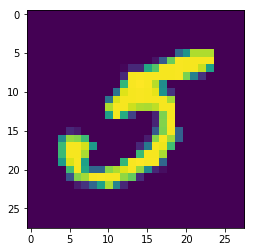

In [63]:
plt.imshow(some_digit_image, interpolation="nearest")

In [64]:
X_train, X_test, y_train, y_test = X[:600000], X[600000:], y[:600000], y[600000:]

In [65]:
import numpy as np

In [66]:
shuffle_index = np.random.permutation(600000)

In [67]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

IndexError: index 441409 is out of bounds for axis 0 with size 70000

In [68]:
#Binary classification of "5"

In [69]:
y_train_5 = (y_train == 5)

In [70]:
y_test_5 = (y_test == 5)

In [71]:
from sklearn.linear_model import SGDClassifier

In [72]:
sgd_clf = SGDClassifier(random_state=42)

In [73]:
sgd_clf.fit(X_train, y_train_5)

/Users/mateusz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [74]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [75]:
from sklearn.cross_validation import cross_val_score

In [77]:
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring="accuracy")

/Users/mateusz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/mateusz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/mateu

array([ 0.9583869 ,  0.9438992 ,  0.94381348])

In [78]:
from sklearn.cross_validation import cross_val_predict

In [83]:
y_train_5_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5)

/Users/mateusz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/mateusz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/mateu

In [81]:
from sklearn.metrics import confusion_matrix

In [85]:
confusion_matrix(y_train_5, y_train_5_pred)

array([[59167,  4520],
       [ 1587,  4726]])